In [3]:
import pandas as pd
#import matplotlib.pyplot as plt
import tensorflow as tf
import numpy
import sys
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot

df = pd.read_csv("data/gender_voice_dataset.csv")
INPUT_SHAPE = 20
LABEL = 'label'
SPLIT_SIZE = 10
EPOCHS = 20

In [4]:

x = df.drop([LABEL], 1)
y = df[LABEL]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
#print(y)

x, x_test, y, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size = 0.5, random_state = 0)
X_train, Y_train = [], []
for i in range(0,SPLIT_SIZE):
    X_train.append(x[int((i*len(x)/SPLIT_SIZE)):(int((i+1)*len(x)/SPLIT_SIZE))])
    Y_train.append(y[(int(i*len(x)/SPLIT_SIZE)):(int((i+1)*len(x)/SPLIT_SIZE))])
    
#print(Y_train)

In [5]:
def model_build() :
    model1 = tf.keras.models.Sequential()
    model1.add(tf.keras.layers.Dense(10, input_shape = (INPUT_SHAPE,), activation='relu', use_bias = False))
    model1.add(tf.keras.layers.Dense(10, activation='relu', use_bias = False))
    model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model1.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model1

In [6]:
models = []
metrics = []
for i in range (0,SPLIT_SIZE):
    models.append(model_build())
    models[i].fit(X_train[i], Y_train[i], epochs = EPOCHS)

for i in range(0,SPLIT_SIZE):
    metrics.append(models[i].evaluate(x_test, y_test))

W1017 11:41:29.387600  7680 deprecation.py:506] From C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1633: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W1017 11:41:29.504193  7680 deprecation.py:323] From C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1017 11:41:29.944374  7680 deprecation.py:323] From C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py:468: BaseResourceVariable.constraint (from tensorflow.p

Train on 221 samples
Epoch 1/20
221/221 [==============================] - 0s 1ms/sample - loss: 7.9478 - acc: 0.4751
Epoch 2/20
221/221 [==============================] - 0s 159us/sample - loss: 7.0863 - acc: 0.4751
Epoch 3/20
221/221 [==============================] - 0s 124us/sample - loss: 6.3676 - acc: 0.4751
Epoch 4/20
221/221 [==============================] - 0s 83us/sample - loss: 5.6654 - acc: 0.4751
Epoch 5/20
221/221 [==============================] - 0s 59us/sample - loss: 5.0441 - acc: 0.4751
Epoch 6/20
221/221 [==============================] - 0s 72us/sample - loss: 4.4489 - acc: 0.4751
Epoch 7/20
221/221 [==============================] - 0s 114us/sample - loss: 3.9040 - acc: 0.4751
Epoch 8/20
221/221 [==============================] - 0s 102us/sample - loss: 3.4708 - acc: 0.4751
Epoch 9/20
221/221 [==============================] - 0s 96us/sample - loss: 3.0080 - acc: 0.5158
Epoch 10/20
221/221 [==============================] - 0s 60us/sample - loss: 2.6287 - acc: 0.

222/222 [==============================] - 0s 44us/sample - loss: 4.3371 - acc: 0.4820
Epoch 3/20
222/222 [==============================] - 0s 67us/sample - loss: 3.9966 - acc: 0.4955
Epoch 4/20
222/222 [==============================] - 0s 65us/sample - loss: 3.6223 - acc: 0.4955
Epoch 5/20
222/222 [==============================] - 0s 67us/sample - loss: 3.3353 - acc: 0.5315
Epoch 6/20
222/222 [==============================] - 0s 68us/sample - loss: 3.0744 - acc: 0.5450
Epoch 7/20
222/222 [==============================] - 0s 102us/sample - loss: 2.8064 - acc: 0.5541
Epoch 8/20
222/222 [==============================] - 0s 66us/sample - loss: 2.6079 - acc: 0.5450
Epoch 9/20
222/222 [==============================] - 0s 65us/sample - loss: 2.4042 - acc: 0.5405
Epoch 10/20
222/222 [==============================] - 0s 59us/sample - loss: 2.0207 - acc: 0.5045
Epoch 11/20
222/222 [==============================] - 0s 53us/sample - loss: 1.7813 - acc: 0.5180
Epoch 12/20
222/222 [=======

222/222 [==============================] - 0s 47us/sample - loss: 1.7703 - acc: 0.4865
Epoch 5/20
222/222 [==============================] - 0s 62us/sample - loss: 1.6119 - acc: 0.4820
Epoch 6/20
222/222 [==============================] - 0s 67us/sample - loss: 1.5041 - acc: 0.4865
Epoch 7/20
222/222 [==============================] - 0s 56us/sample - loss: 1.3878 - acc: 0.4955
Epoch 8/20
222/222 [==============================] - 0s 69us/sample - loss: 1.3077 - acc: 0.5270
Epoch 9/20
222/222 [==============================] - 0s 53us/sample - loss: 1.2122 - acc: 0.5315
Epoch 10/20
222/222 [==============================] - 0s 59us/sample - loss: 1.1542 - acc: 0.5045
Epoch 11/20
222/222 [==============================] - 0s 89us/sample - loss: 1.0836 - acc: 0.4955
Epoch 12/20
222/222 [==============================] - 0s 61us/sample - loss: 1.0402 - acc: 0.4955
Epoch 13/20
222/222 [==============================] - 0s 81us/sample - loss: 0.9793 - acc: 0.5045
Epoch 14/20
222/222 [======

In [7]:
sum = 0
for i in metrics:
    print(i[1])
    sum = sum + i[1]

average = sum/SPLIT_SIZE
print(average)

0.51578945
0.55789477
0.49684212
0.4757895
0.55368423
0.37473685
0.44
0.61473686
0.46526316
0.5010526
0.49957895278930664


In [8]:
m = models[0].get_weights()
for num in range(1,SPLIT_SIZE):
    a = models[num].get_weights()
    m = numpy.add(m,a)
m /= SPLIT_SIZE
model = model_build()
model.set_weights(m)
loss, acc = model.evaluate(x_test, y_test)
print(acc)
print(loss)  

475/475 [==============================] - 0s 255us/sample - loss: 0.7062 - acc: 0.6232
0.6231579
0.7062336533947995


In [9]:
#Selecting random 5 models
list2 = []
for i in range(0,5):
    list2.append(random.randrange(0,10))
print(list2)
m3 = models[list2[0]].get_weights()
for i in list2:
    a = models[i].get_weights()
    m3 = numpy.add(m3,a)
    print(i)

m3 /= 5
print(all([numpy.allclose(x, y) for x, y in zip(m, m3)]))
model3 = model_build()
model3.set_weights(m3)
loss, acc = model3.evaluate(x_test, y_test)
print(acc)
print(loss)  

[8, 6, 6, 7, 0]
8
6
6
7
0
False
475/475 [==============================] - 0s 347us/sample - loss: 0.8590 - acc: 0.5411
0.54105264
0.8589792897826747


In [10]:
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
num_weights = 10
sol_per_pop = 10

num_parents_mating = int(sol_per_pop/2)
best_outputs = []
average_outputs = []
num_generations = 10
no_of_layers = len(models[0].get_weights())
print(no_of_layers)


# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(size=pop_size)
for i in range(0,sol_per_pop):
    numsum = 0
    for j in range(0,num_weights):
        numsum += new_population[i][j]
    for j in range(0,num_weights):
        new_population[i][j] /= numsum
print(new_population)

4
[[0.02167836 0.02586608 0.12799633 0.21291524 0.20131746 0.0612881
  0.00880287 0.05407403 0.23844769 0.04761385]
 [0.21124939 0.06993383 0.02657503 0.01343019 0.12121912 0.13225492
  0.02711842 0.07054736 0.16171559 0.16595616]
 [0.25261238 0.08604371 0.00854822 0.05098393 0.09925066 0.06444465
  0.02704419 0.17589019 0.13256031 0.10262175]
 [0.01498363 0.05813025 0.0230406  0.19820426 0.02559054 0.22670182
  0.00158194 0.24006594 0.06383845 0.14786257]
 [0.11179645 0.10794496 0.14099007 0.11735187 0.0123794  0.02163474
  0.15068163 0.12650425 0.07628244 0.13443418]
 [0.12210996 0.09809138 0.02996399 0.11105071 0.05583117 0.15428549
  0.15965788 0.11434432 0.12551656 0.02914854]
 [0.20194536 0.13467809 0.00614637 0.12165166 0.18346711 0.07151494
  0.12791566 0.06111088 0.04475496 0.04681498]
 [0.00829951 0.10184976 0.07511695 0.07535713 0.07606767 0.09977046
  0.1614491  0.16581838 0.09260167 0.14366938]
 [0.11332868 0.15296851 0.0338595  0.02332622 0.12468871 0.07326712
  0.0302455

In [11]:
def cal_pop_fitness(x_test, y_test, pop, num_weights):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    fitness = numpy.zeros(num_weights)
    for i,weights in enumerate(pop):
        x = float(weights[0])
        m = numpy.multiply(x,models[0].get_weights())
        for num in range(1,num_weights):
            x = float(weights[num])
            a = numpy.multiply(x,models[num].get_weights())
            m = numpy.add(m,a)
        model = model_build()
        model.set_weights(m)
        loss, acc = model.evaluate(x_test, y_test)
        fitness[i] = acc
    
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.argmax(fitness)
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, num_mutations):
    mutations_counter = numpy.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            # The random value to be added to the gene.
            random_value = numpy.random.uniform(0, 1.0, 1)/10
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx = gene_idx + mutations_counter
    
    for i in range(offspring_crossover.shape[0]):
        numsum = 0
        for j in range(num_weights):
            numsum += offspring_crossover[i][j]
        for j in range(0,num_weights):
            offspring_crossover[i][j] /= numsum
    return offspring_crossover


In [12]:
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(x_test, y_test, new_population, num_weights)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(fitness))
    average_outputs.append(numpy.sum(fitness)/num_weights)
    # The best result in the current iteration.
    print("Best result : ", numpy.max(fitness))
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

Generation :  0
475/475 [==============================] - 0s 382us/sample - loss: 0.6910 - acc: 0.3179
Fitness
[0.51578945 0.48421052 0.47789472 0.47368422 0.51578945 0.48421052
 0.47578949 0.47368422 0.48421052 0.31789473]
Best result :  0.5157894492149353
Parents
[[0.02167836 0.02586608 0.12799633 0.21291524 0.20131746 0.0612881
  0.00880287 0.05407403 0.23844769 0.04761385]
 [0.11179645 0.10794496 0.14099007 0.11735187 0.0123794  0.02163474
  0.15068163 0.12650425 0.07628244 0.13443418]
 [0.21124939 0.06993383 0.02657503 0.01343019 0.12121912 0.13225492
  0.02711842 0.07054736 0.16171559 0.16595616]
 [0.12210996 0.09809138 0.02996399 0.11105071 0.05583117 0.15428549
  0.15965788 0.11434432 0.12551656 0.02914854]
 [0.11332868 0.15296851 0.0338595  0.02332622 0.12468871 0.07326712
  0.03024558 0.21181252 0.09311881 0.14338434]]
Crossover
[[0.02167836 0.02586608 0.12799633 0.21291524 0.20131746 0.02163474
  0.15068163 0.12650425 0.07628244 0.13443418]
 [0.11179645 0.10794496 0.1409900

475/475 [==============================] - 0s 597us/sample - loss: 0.6903 - acc: 0.5895
Fitness
[0.58947366 0.56631577 0.55368423 0.51789474 0.51578945 0.60000002
 0.48421052 0.5726316  0.51578945 0.58947366]
Best result :  0.6000000238418579
Parents
[[0.08688273 0.08388954 0.10957058 0.09120013 0.14714511 0.05600798
  0.00804448 0.04941542 0.21790484 0.14993919]
 [0.09809035 0.09471105 0.12370487 0.10296469 0.08023847 0.11604064
  0.02379374 0.06189835 0.14188947 0.15666836]
 [0.01856993 0.02215718 0.10964312 0.18238563 0.22038291 0.09940174
  0.02038199 0.05302284 0.12154415 0.15251052]
 [0.0157461  0.01878786 0.0929703  0.15465126 0.27482788 0.01577654
  0.1098804  0.09224971 0.05562686 0.16948309]
 [0.11692474 0.1578224  0.0349339  0.0240664  0.17442388 0.06323285
  0.00908219 0.05578987 0.24601394 0.11770983]]
Crossover
[[0.08688273 0.08388954 0.10957058 0.09120013 0.14714511 0.11604064
  0.02379374 0.06189835 0.14188947 0.15666836]
 [0.09809035 0.09471105 0.12370487 0.10296469 0.

475/475 [==============================] - 0s 880us/sample - loss: 0.7525 - acc: 0.4842
Fitness
[0.66736841 0.65052634 0.64842105 0.60210526 0.60000002 0.52842104
 0.53473687 0.48421052 0.52210528 0.48421052]
Best result :  0.6673684120178223
Parents
[[0.01745739 0.02082973 0.10307433 0.17145878 0.25223183 0.01483135
  0.10329739 0.08672297 0.05229421 0.17780203]
 [0.01521494 0.01815409 0.08983411 0.14943437 0.25812366 0.04881358
  0.00701114 0.04306785 0.18991429 0.18043196]
 [0.01799998 0.02147713 0.10627793 0.17678781 0.23614962 0.01529232
  0.10650792 0.08941836 0.05391954 0.17616939]
 [0.01399981 0.01670422 0.08265958 0.13749991 0.32229607 0.01318651
  0.09184136 0.0771051  0.04649461 0.19821283]
 [0.08688273 0.08388954 0.10957058 0.09120013 0.14714511 0.05600798
  0.00804448 0.04941542 0.21790484 0.14993919]]
Crossover
[[0.01745739 0.02082973 0.10307433 0.17145878 0.25223183 0.04881358
  0.00701114 0.04306785 0.18991429 0.18043196]
 [0.01521494 0.01815409 0.08983411 0.14943437 0.

475/475 [==============================] - 0s 997us/sample - loss: 0.6921 - acc: 0.6800
Fitness
[0.67578948 0.66736841 0.65052634 0.64842105 0.60210526 0.58736843
 0.66947371 0.49684212 0.51368421 0.68000001]
Best result :  0.6800000071525574
Parents
[[0.01189579 0.01419376 0.07023675 0.11683518 0.30772569 0.04185442
  0.00601159 0.03692784 0.16283897 0.23148   ]
 [0.01231239 0.01469084 0.07269649 0.12092683 0.28772731 0.04925725
  0.00707486 0.0434593  0.19164042 0.20021431]
 [0.01582152 0.01887785 0.09341559 0.15539197 0.25500502 0.04423943
  0.00635415 0.03903211 0.17211808 0.19974429]
 [0.01745739 0.02082973 0.10307433 0.17145878 0.25223183 0.01483135
  0.10329739 0.08672297 0.05229421 0.17780203]
 [0.01521494 0.01815409 0.08983411 0.14943437 0.25812366 0.04881358
  0.00701114 0.04306785 0.18991429 0.18043196]]
Crossover
[[0.01189579 0.01419376 0.07023675 0.11683518 0.30772569 0.04925725
  0.00707486 0.0434593  0.19164042 0.20021431]
 [0.01231239 0.01469084 0.07269649 0.12092683 0.

475/475 [==============================] - 1s 1ms/sample - loss: 0.7027 - acc: 0.4800
Best solution :  [0.01189579 0.01419376 0.07023675 0.11683518 0.30772569 0.04185442
 0.00601159 0.03692784 0.16283897 0.23148   ]
Best solution fitness :  0.6800000071525574


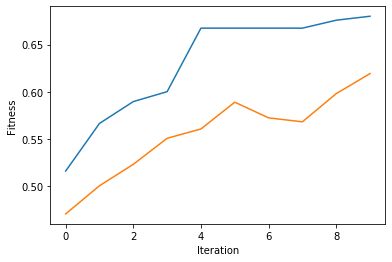

In [13]:
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(x_test,y_test, new_population, num_weights)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.argmax(fitness)

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

x = numpy.arange(num_generations)

matplotlib.pyplot.plot(x, best_outputs)
matplotlib.pyplot.plot(x, average_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

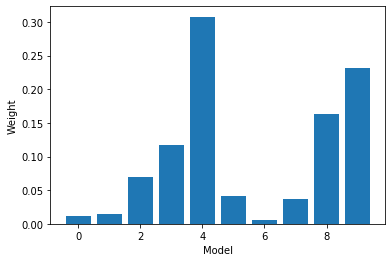

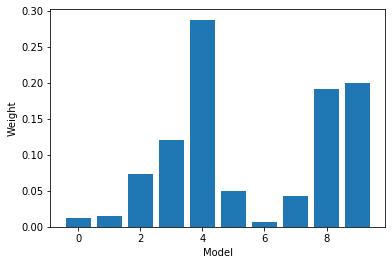

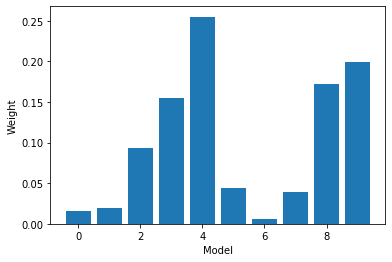

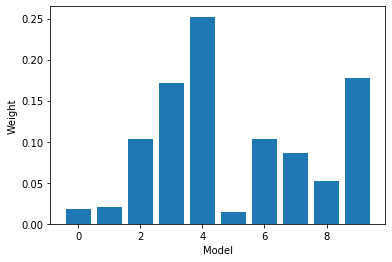

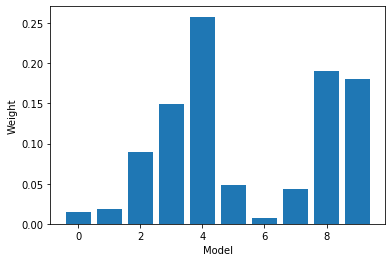

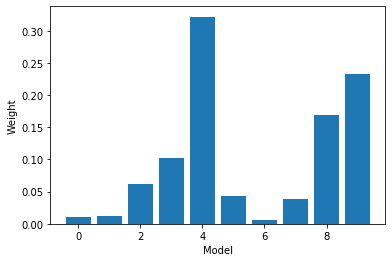

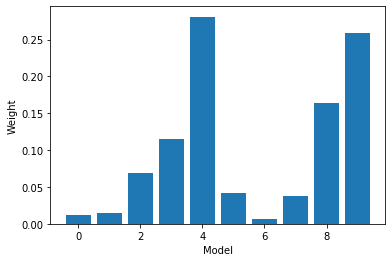

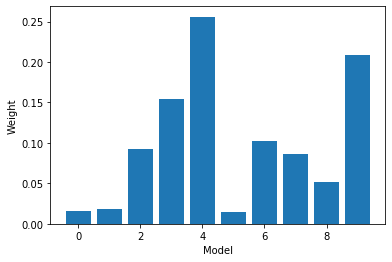

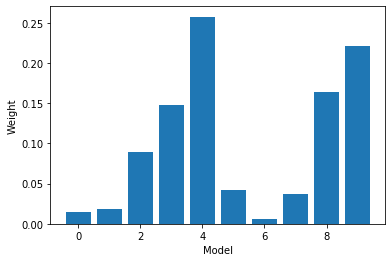

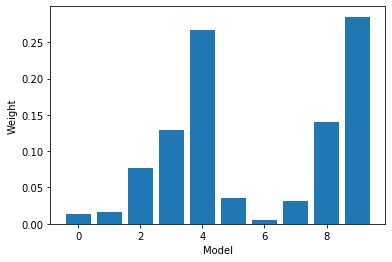

In [14]:
x = numpy.arange(num_weights)
for i in range(sol_per_pop):
    matplotlib.pyplot.bar(x, new_population[i])
    matplotlib.pyplot.xlabel("Model")
    matplotlib.pyplot.ylabel("Weight")
    matplotlib.pyplot.show()

In [15]:
m = models[0].get_weights()
for num in range(1,SPLIT_SIZE):
    a = models[num].get_weights()
    m = numpy.add(m,a)
m /= SPLIT_SIZE
model = model_build()
model.set_weights(m)
loss, acc = model.evaluate(x_valid, y_valid)
print(acc)
print(loss)  

476/476 [==============================] - 1s 1ms/sample - loss: 0.7119 - acc: 0.5546
0.5546219
0.7119167151571322


In [18]:
weights = new_population[numpy.argmax(fitness)]
mf = numpy.multiply(weights[0],models[0].get_weights())
for num in range(1,SPLIT_SIZE):
    a =  numpy.multiply(weights[num],models[num].get_weights())
    mf = numpy.add(mf,a)

modelf = model_build()
modelf.set_weights(mf)
loss, acc = modelf.evaluate(x_valid, y_valid)
print(acc)
print(loss) 
    

476/476 [==============================] - 1s 1ms/sample - loss: 0.6925 - acc: 0.6807
0.6806723
0.6924918208803449
